In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Seleccionamos algunas caracteristicas que queremos usar para la regresion

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Grafiquemos los valores de emision con respecto al tamaño del motor

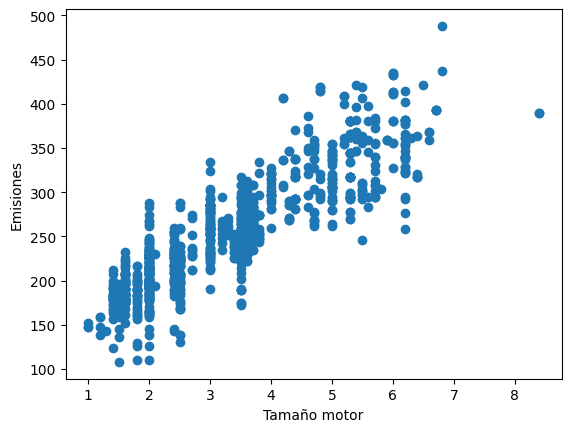

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel('Tamaño motor')
plt.ylabel('Emisiones')
plt.show()

Creando datos de entrenamiento y prueba


In [ ]:
msk = np.random.rand(len(df)) < 0.8

train= cdf[msk]
test = cdf[~msk]

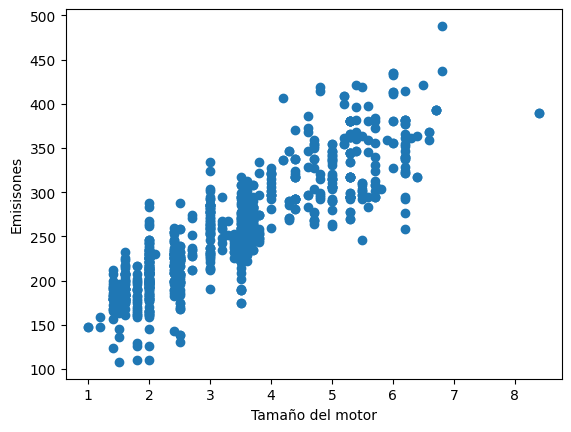

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.xlabel('Tamaño del motor')
plt.ylabel('Emisisones')
plt.show()

Modelo de regresion multiple

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
#Los coeficientes
print('Coeficientes:', regr.coef_)

Coeficientes: [[10.10590734  7.66560644  9.71084281]]


Predicción

In [ ]:
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print('Mean Squared Error(MSE): %.2f' % np.mean(y_hat - y) **2)

#Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' %regr.score(x,y))

Mean Squared Error(MSE): 0.00
Variance score: 0.86


C:\Users\Genia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


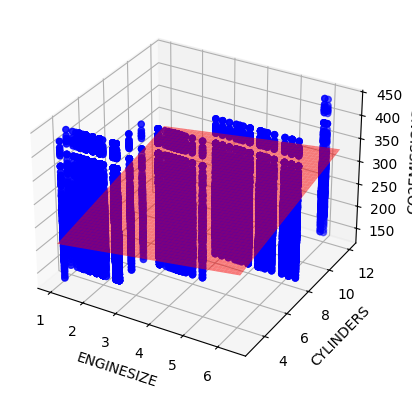

In [26]:
beta_0 = regr.intercept_[0]
beta_1 = regr.coef_[0][0]
beta_2 = regr.coef_[0][1]
beta_3 = regr.coef_[0][2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fixed_fuel = np.mean(x[:, 2])  # Promedio de FUELCONSUMPTION_COMB para mantenerlo fijo

enginesize_range = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
cylinders_range = np.linspace(x[:, 1].min(), x[:, 1].max(), 100)
enginesize_range, cylinders_range = np.meshgrid(enginesize_range, cylinders_range)

# Calcular CO2EMISSIONS usando la ecuación del hiperplano
co2_emissions_range = beta_0 + beta_1 * enginesize_range + beta_2 * cylinders_range + beta_3 * fixed_fuel

# Graficar la superficie 3D
ax.plot_surface(enginesize_range, cylinders_range, co2_emissions_range, color='r', alpha=0.5)

# Graficar los puntos reales
ax.scatter(x[:, 0], x[:, 1], y, color='blue', label='Datos reales')

# Etiquetas
ax.set_xlabel('ENGINESIZE')
ax.set_ylabel('CYLINDERS')
ax.set_zlabel('CO2EMISSIONS')

plt.show()

Ejercicio hacerlo con otras varaibles indp


In [30]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
print(regr.coef_)

x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])

print("Residual sum of squares: %.2f"% np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))


[[10.20063968  7.11959244  6.64933008  2.66472082]]
Residual sum of squares: 551.30
Variance score: 0.86


C:\Users\Genia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
